# CS6140 Machine Learning: Assignment 4 (F22) (Total Points: 100)
## Prof. Ahmad Uzair


## 2. PCA understanding [10 pts]

#### 1. Write your understanding of PCA.

PCA reduces the dimensionality of a data set by identifying the most important exes of variation and using only the most important. Since some features are unhelpful to build the model and make predictions, PCA can project data onto primary axis, which, in many cases, projects the data from higher dimension space to lower dimension space by linear combination based on the original features.

#### 2. Why is it needed?

PCA helps us to find the important patterns, and it can simplify the complexity in higher dimension space while retaining trends and patterns, which compress the data and retain most of the information. And this helps us to understand the data. In the reduced dimension space, we can observe the trends, jumps, clusters, and outliers efficiently, and uncover the relationships between observations and variables. This can solve the collinearity by decorating the features, which by reducing the influence of some features to observe the true relationships between the features and observations.

#### 3. How does it works?

First, we decompose the correlation matrix and get the eigenvalues and eigenvectors. Then we use the eigenvectors to transform the input data. Based on the eigenvalues, we select the most important or most explanatory components, and discard some of the components that are not much explanatory.

#### 4. How does it helps ?

PCA reduces data by geometrically projecting them onto lower dimensions called principal components, with the goal of finding the best summary of the data using a limited number of PCs. The PC(s) are chosen to minimize the total distance between the data and their projection onto the PC. By minimizing this distance, we also maximize the variance of the projected points. In this case we can increase interpretability but at the same time minimizing information loss.

#### 5. Think of and give an example scenario where it is useful and can be used.

Assume we have a dataset that the features are strongly correlated, in this case, we need to apply PCA to the dataset. For instance, there is a dataset describes the expenditure of different customers in a mall. The dataset may contain their ages, incomes, living regions, credit card limits, etc. There might be some relationships between the features, so we do not know which feature affect the expenditure the most, like maybe both income and credit card limit have a positive relationship with the amount of expenditure, and we need to know the importance of different features. That's the reason why we use PCA.

## 2. Coding Exercise [30 pts]

In [58]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesClassifier

** Note : Read The Whole Question For Better Understanding Of The Demand Of The Exercise.**

Read the given csv file ('airbnb.csv')

### 1. [Feature elimination] : Carefully look and understand the nature of the data, remove potentially unnecessary/less useful features. [2 pts]

[Hint: After elimination you should be left with 8-10 features]



In [59]:
airbnb_data = pd.read_csv('airbnb.csv')
print('Shape of dateset: ', airbnb_data.shape)
airbnb_data.head()

Shape of dateset:  (48895, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


##### Cardinalities

In [60]:
airbnb_data.nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

##### Missing values

In [61]:
airbnb_data.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [62]:
# Fill out the missing values in name with Unknown
airbnb_data.loc[airbnb_data['name'].isna(), 'name'] = 'Unknown'

# Fill out the host name accordingly
host_dict = airbnb_data.groupby(['host_id'])['host_name'].apply(list).to_dict()
host_dict = {key: val[0] for key, val in host_dict.items()}
na_hostname_rows = airbnb_data.loc[airbnb_data['host_name'].isna(), 'host_name'].index
airbnb_data['host_name'] = airbnb_data['host_name'].fillna(airbnb_data['host_id'].map(host_dict))

# All missing host names have not appeared in other records, so fill out the missing values in host name with Unknown
airbnb_data.loc[airbnb_data['host_name'].isna(), 'host_name'] = 'Unknown'

In [63]:
# Fill out missing reviews per month according to num_of reviews
np.array(airbnb_data.loc[airbnb_data['reviews_per_month'].isna(), 'number_of_reviews'])
airbnb_data.loc[airbnb_data['reviews_per_month'].isna(), 'reviews_per_month'] = 0

In [64]:
airbnb_data.isna().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

ID is sufficient to represent the name and host id is sufficient to represent the host name.
The last review date is not able to be filled out.
In this case,these three columns are dropped off.

In [65]:
airbnb_data.drop(['name', 'host_name', 'last_review'], axis = 1, inplace = True)
airbnb_data.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


##### Feature relations

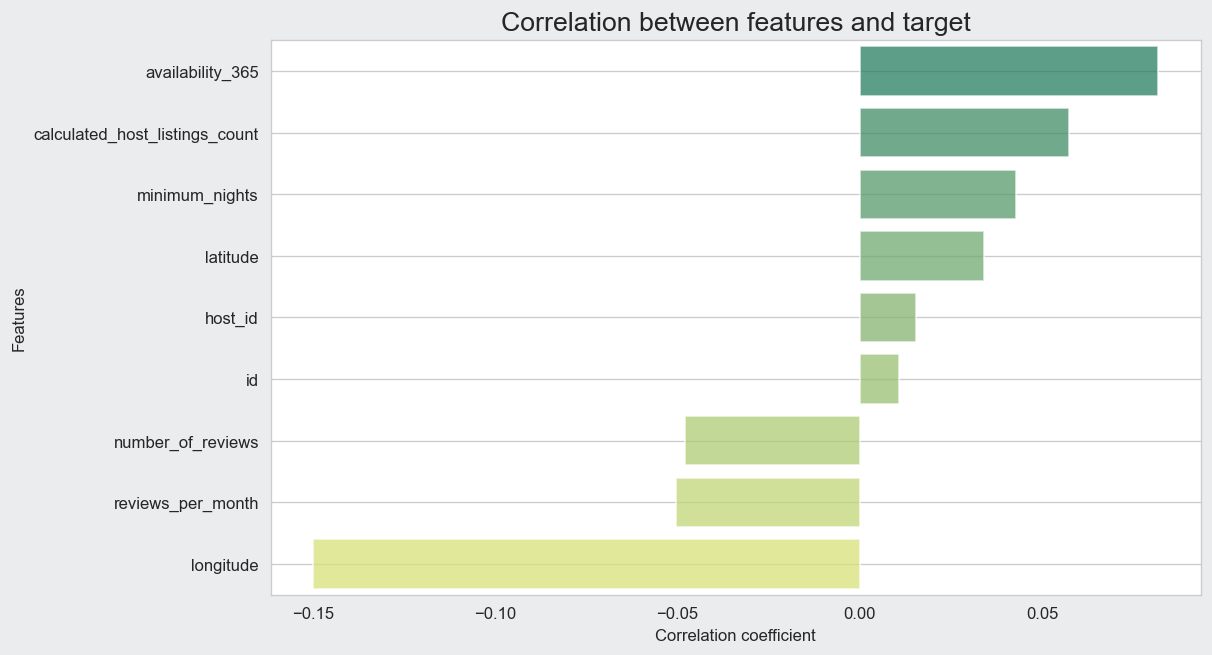

In [66]:
features = list(airbnb_data.columns[(airbnb_data.columns != 'price') &
                                    (airbnb_data.columns != 'neighbourhood') &
                                    (airbnb_data.columns != 'neighbourhood_group') &
                                    (airbnb_data.columns != 'room_type')])

correlation_table = []
for col in features:
    y = airbnb_data['price']
    x = airbnb_data[col]
    corr = np.corrcoef(x, y)[1][0]
    d = {'Features': col, 'Correlation coefficient' : corr}
    correlation_table.append(d)
corr_df = pd.DataFrame(correlation_table)

plt.figure(figsize=(10,6), dpi = 120, facecolor = '#EAECEE')
sns.barplot(x = "Correlation coefficient", y = "Features",
            data = corr_df.sort_values("Correlation coefficient", ascending = False),
            palette = 'summer', alpha = 0.75)

plt.grid()
plt.title('Correlation between features and target', fontsize = 16)
plt.show()

C:\Users\devil\AppData\Local\Temp\ipykernel_25848\132287104.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(airbnb_data.corr(), cmap = 'cool')


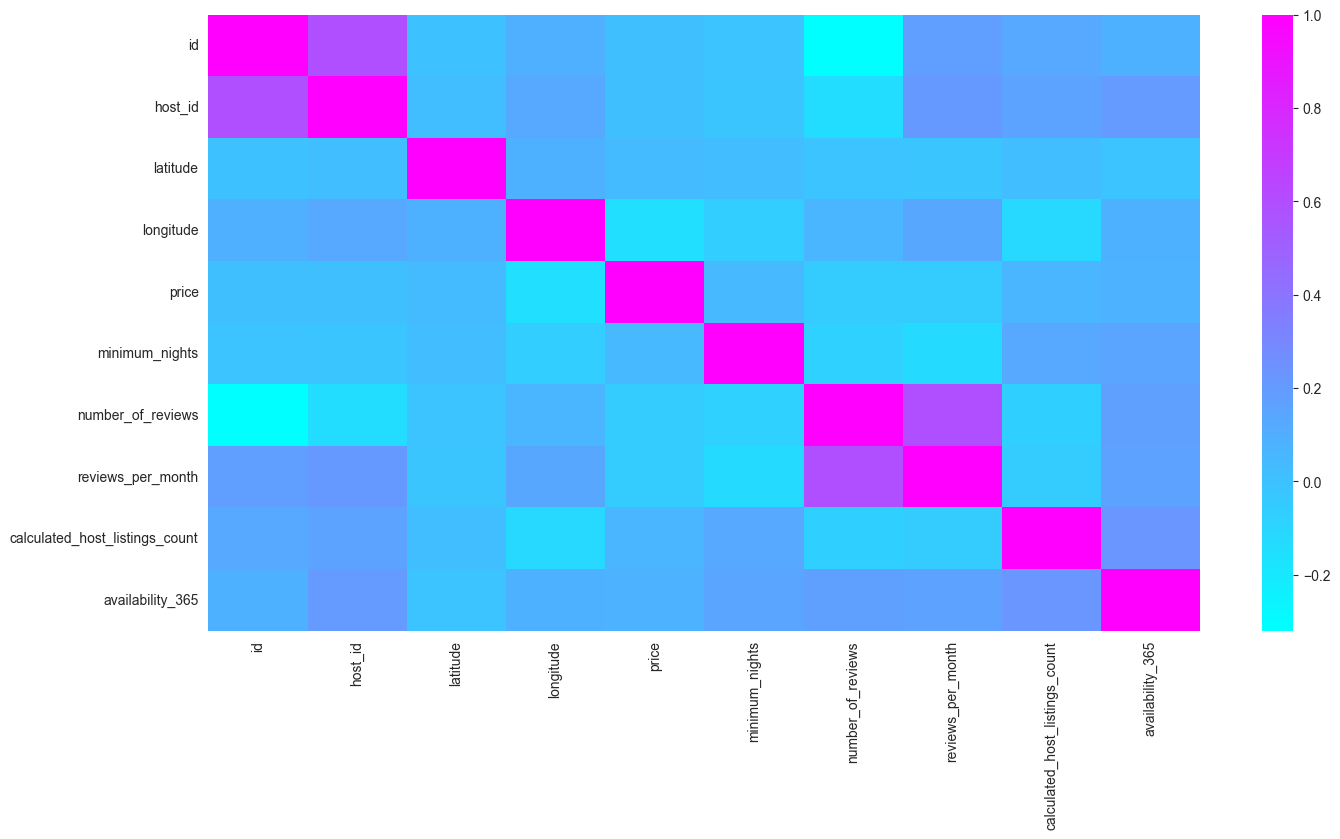

In [67]:
plt.figure(figsize = (16, 8), dpi = 100)
sns.heatmap(airbnb_data.corr(), cmap = 'cool')
plt.show()

Feature ranking:
1. feature 3 (0.146089)
2. feature 2 (0.145114)
3. feature 0 (0.141160)
4. feature 1 (0.130034)
5. feature 6 (0.106606)
6. feature 5 (0.099035)
7. feature 4 (0.097909)
8. feature 8 (0.091645)
9. feature 7 (0.042408)


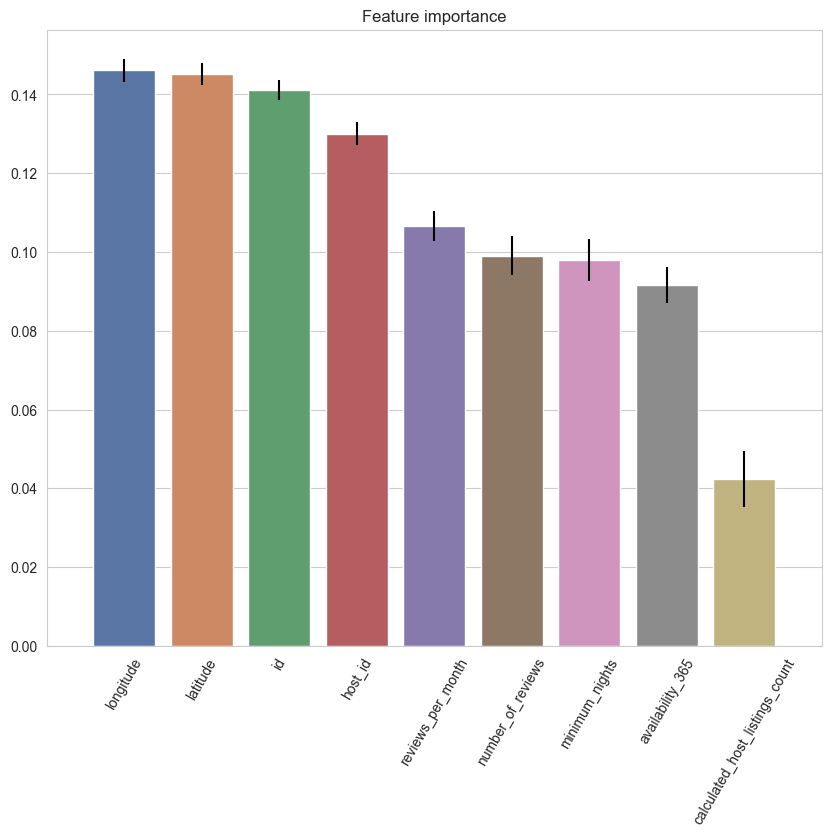

In [68]:
# Feature Importance
feas = airbnb_data[features]
labs = airbnb_data['price']
forest = ExtraTreesClassifier(n_estimators = 100, random_state = 0)
forest.fit(feas, labs)

importance = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis = 0)
indices = np.argsort(importance)[::-1]

print("Feature ranking:")

for f in range(feas.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importance[indices[f]]))

plt.figure(figsize = (10, 8), dpi = 100)
plt.title("Feature importance")
sns.barplot(x = np.array(features)[indices], y = importance[indices], palette = "deep",yerr = std[indices])
plt.xticks(range(feas.shape[1]), np.array(features)[indices], rotation = 60)
plt.xlim([-1, feas.shape[1]])
plt.show()

According to the feature importance and correlations, id and host_id contribute almost nothing in dataset. Also, reviews_per_month and last_review has about the same effect, and reviews_per_month is more important.
As the result, we'll drop id, host_id, and number_of_reviews from the dataset.

In [69]:
airbnb_data.drop(['id', 'host_id', 'number_of_reviews'], axis = 1, inplace = True)
print('Shape of trimmed dataset: ', airbnb_data.shape)
airbnb_data.head()

Shape of trimmed dataset:  (48895, 10)


,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0.00,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,0.10,1,0


### 2. Data conversion
Select appropriate text features and suitably convert them into numerical features. [5 pts]



In [70]:
cat_features = ['neighbourhood_group', 'neighbourhood', 'room_type']
encoder = LabelEncoder()

print('neighbourhood_group mapping:')
encoder.fit(airbnb_data['neighbourhood_group'])
print(dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))
airbnb_data['neighbourhood_group'] = encoder.transform(airbnb_data['neighbourhood_group'])

print('neighbourhood mapping:')
encoder.fit(airbnb_data['neighbourhood'])
print(dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))
airbnb_data['neighbourhood'] = encoder.transform(airbnb_data['neighbourhood'])

print('room_type mapping:')
encoder.fit(airbnb_data['room_type'])
print(dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))
airbnb_data['room_type'] = encoder.transform(airbnb_data['room_type'])

neighbourhood_group mapping:
{'Bronx': 0, 'Brooklyn': 1, 'Manhattan': 2, 'Queens': 3, 'Staten Island': 4}
neighbourhood mapping:
{'Allerton': 0, 'Arden Heights': 1, 'Arrochar': 2, 'Arverne': 3, 'Astoria': 4, 'Bath Beach': 5, 'Battery Park City': 6, 'Bay Ridge': 7, 'Bay Terrace': 8, 'Bay Terrace, Staten Island': 9, 'Baychester': 10, 'Bayside': 11, 'Bayswater': 12, 'Bedford-Stuyvesant': 13, 'Belle Harbor': 14, 'Bellerose': 15, 'Belmont': 16, 'Bensonhurst': 17, 'Bergen Beach': 18, 'Boerum Hill': 19, 'Borough Park': 20, 'Breezy Point': 21, 'Briarwood': 22, 'Brighton Beach': 23, 'Bronxdale': 24, 'Brooklyn Heights': 25, 'Brownsville': 26, "Bull's Head": 27, 'Bushwick': 28, 'Cambria Heights': 29, 'Canarsie': 30, 'Carroll Gardens': 31, 'Castle Hill': 32, 'Castleton Corners': 33, 'Chelsea': 34, 'Chinatown': 35, 'City Island': 36, 'Civic Center': 37, 'Claremont Village': 38, 'Clason Point': 39, 'Clifton': 40, 'Clinton Hill': 41, 'Co-op City': 42, 'Cobble Hill': 43, 'College Point': 44, 'Columbia

In [71]:
airbnb_data.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,reviews_per_month,calculated_host_listings_count,availability_365
0,1,108,40.64749,-73.97237,1,149,1,0.21,6,365
1,2,127,40.75362,-73.98377,0,225,1,0.38,2,355
2,2,94,40.80902,-73.94190,1,150,3,0.00,1,365
3,1,41,40.68514,-73.95976,0,89,1,4.64,1,194
4,2,61,40.79851,-73.94399,0,80,10,0.10,1,0


### 3. Model Training:
Train a linear regression model over the entire data.  [5 pts]

[Note 1: A library can be used, Target variable is 'price', Use all features.]

[Note 2: Report and maintain accuracy and time taken to train the model]



In [77]:
X = airbnb_data.loc[:, airbnb_data.columns != 'price']
y = airbnb_data.loc[:, 'price']

features_in_model = []
RMSE = []
training_time = []
ttl_time = []

regressor = LinearRegression()

start = time.time()
regressor.fit(X, y)
end = time.time()
print(f'Time taken to train on all features: {np.round(end - start, 4)}s')

features_in_model.append(len(X.columns))
RMSE.append(np.sqrt(mean_squared_error(y, regressor.predict(X))))
training_time.append(end - start)
ttl_time.append(end - start)

# print(f'R^2: {np.round(regressor.score(X, y), 4)}')
print(f'RMSE: {np.round(RMSE[-1], 4)}')

Time taken to train on all features: 0.014s
RMSE: 229.2687


### 4. Apply PCA: 
Use PCA to reduce dimensions to N = 5, 4, 3, 2, 1. Using these new features, train the a new model again. [10 pts.]

[Note 3: A library can be used for PCA, Target variable is still 'price', Use 'N' features at a time for a model.]

[Note 4: Report and maintain accuracy and time taken to train each the model and also the time taken for PCA for each 'N' value.]




In [78]:
for n_com in range(5, 0, -1):
    pca = PCA(n_components = n_com)

    start = time.time()
    components = pca.fit_transform(X)
    end = time.time()
    print(f'n_components = {n_com}')
    print(f'Time taken for PCA: {np.round(end - start, 4)}s')
    training_time.append(end - start)

    start = time.time()
    regressor.fit(components, y)
    end = time.time()
    print(f'Total explained variance: {pca.explained_variance_ratio_.sum() * 100}')
    print(f'Time taken to train: {np.round(end - start, 4)}s')

    features_in_model.append(n_com)
    RMSE.append(np.sqrt(mean_squared_error(y, regressor.predict(components))))
    ttl_time.append(training_time[-1] + end - start)

    # print(f'R^2: {np.round(regressor.score(components, y), 4)}')
    print(f'RMSE: {np.round(RMSE[-1], 4)}')
    print()

n_components = 5
Time taken for PCA: 0.0476s
Total explained variance: 99.99650611627565
Time taken to train: 0.006s
RMSE: 238.2077

n_components = 4
Time taken for PCA: 0.036s
Total explained variance: 99.98627898392066
Time taken to train: 0.005s
RMSE: 238.576

n_components = 3
Time taken for PCA: 0.0386s
Total explained variance: 98.26790506177832
Time taken to train: 0.005s
RMSE: 238.6386

n_components = 2
Time taken for PCA: 0.0352s
Total explained variance: 93.8838368416544
Time taken to train: 0.0041s
RMSE: 238.8197

n_components = 1
Time taken for PCA: 0.0331s
Total explained variance: 73.85429998479019
Time taken to train: 0.001s
RMSE: 239.3493



### 5. Visualisation 
[6 pts]
5.1 Plot a graph, for number of features vs accuracy [Total 1+5 plots]. [2 pts]
5.2 Plot a graph, for time spend on training models [excluding the PCA time] vs accuracy [Total 1+5 plots]. [2 pts]

5.3 Plot a graph, for time spend on training models [including the PCA time] vs accuracy [Total 1+5 plots]. [2 pts]

[Note 5] : Since each sub part have 6 plots, try to make a 2x3 or 3x2 type of plot, so that 'glance' is possible.




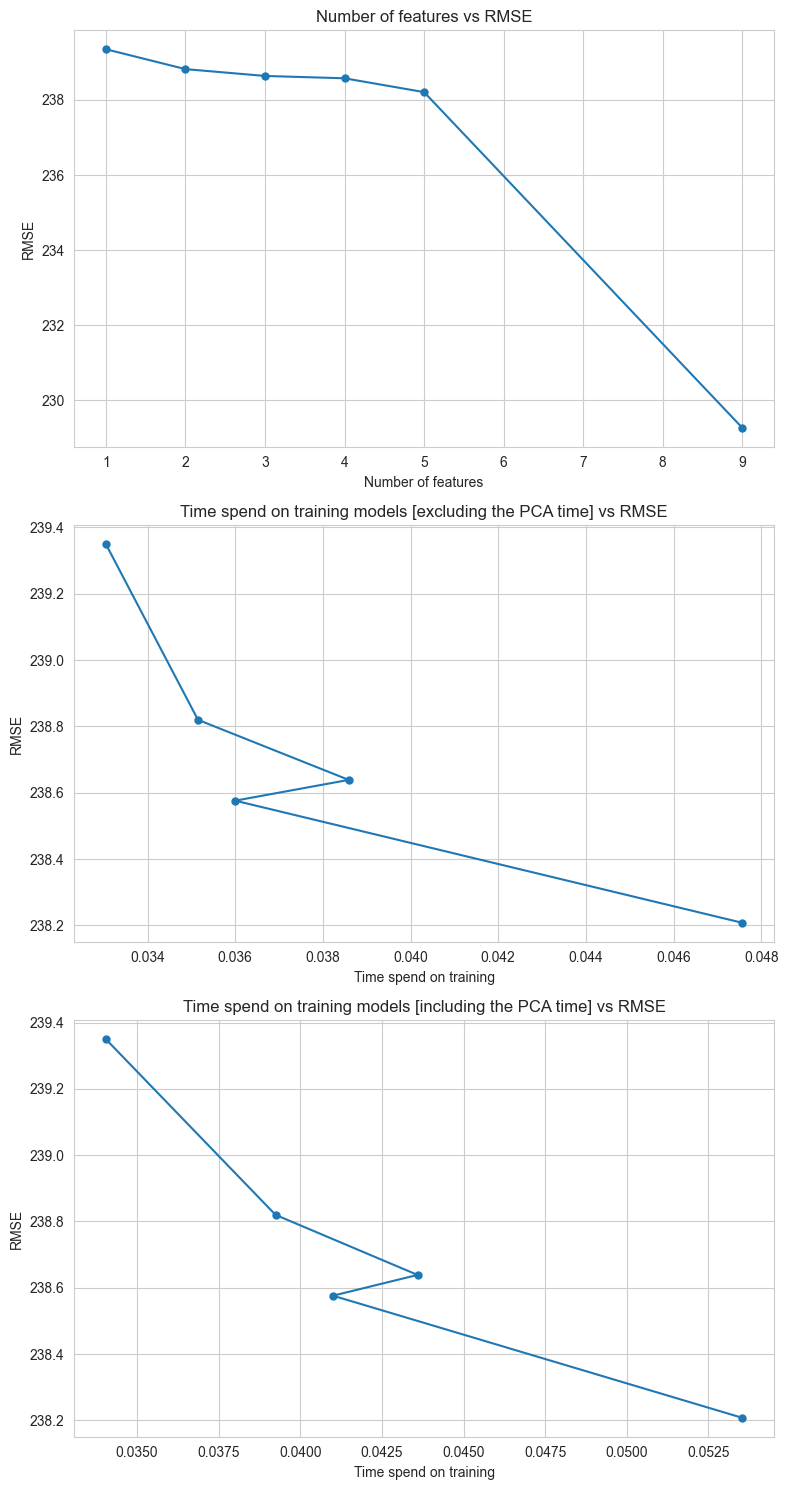

In [94]:
plt.figure(figsize = (8, 15))

plt.subplot(3, 1, 1)
plt.plot(features_in_model, RMSE, marker = 'o', markersize = 5)
plt.title('Number of features vs RMSE')
plt.xlabel('Number of features')
plt.ylabel('RMSE')

plt.subplot(3, 1, 2)
# plt.plot(training_time[1: ] + [training_time[0]], RMSE[1: ] + [RMSE[0]], marker = 'o', markersize = 5)
plt.plot(training_time[1: ], RMSE[1: ], marker = 'o', markersize = 5)
plt.title('Time spend on training models [excluding the PCA time] vs RMSE')
plt.xlabel('Time spend on training')
plt.ylabel('RMSE')

plt.subplot(3, 1, 3)
plt.plot(ttl_time[1: ], RMSE[1: ], marker = 'o', markersize = 5)
plt.title('Time spend on training models [including the PCA time] vs RMSE')
plt.xlabel('Time spend on training')
plt.ylabel('RMSE')

plt.tight_layout()
plt.show()

### 6. Analyze 
Have a look on the created plots, what do you think about the effectiveness of PCA in this practical application? Write your opinion with supportive arguments. [2 pts]

The performance of PCA depends on how the features relate to each other significantly. If the input features are not that correlated with each other, or say, is independent to each other, the PCA will not increase the performance of modelling a lot, in some cases, PCA may lead to a worse performance. Otherwise, the PCA will help a lot in the case that features are strongly correlated.